This notebook roughly follows [Detecting opinion spams and fake news ... (2017)](https://www.researchgate.net/publication/322128415_Detecting_opinion_spams_and_fake_news_using_text_classification) by copy-pasting some code from CodeBasic's [videos](https://www.youtube.com/playlist?list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX) and [notebooks](https://github.com/codebasics/nlp-tutorials/blob/main/11_bag_of_n_grams/10_bag_of_n_grams.ipynb).

<div style="color:red;">Please download the Kaggle dataset and LIAR dataset first.</div>

# Import the python libraries

In [2]:
# importing libraries being used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in datasets

In [2]:
# The first dataset is the LIAR dataset, which is a dataset of fact-checked statements.
liar_df = pd.read_csv('./Datasets/liar_dataset/train.tsv', sep='\t')
liar_df.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state', 'party', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire', 'context']
liar_df.head()

,id,label,statement,subject,speaker,job_title,state,party,barely_true,false,half_true,mostly_true,pants_on_fire,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [3]:
# Removing the columns that are not needed for the analysis, keepink only the statement and the label
condensed_liar = pd.DataFrame()
condensed_liar[['Label','Statement']] = liar_df.iloc[: , [1, 2]].copy()

# Creating a new column with the truth value of the statement being only true or false (1 or 0):
condensed_liar['Truth'] = condensed_liar.Label.map({
     'pants-fire': 0,
     'false': 0,
     'mostly-false': 0,
     'half-true': 0,
     'barely-true': 1,
     'mostly-true': 1,
     'true': 1
})
condensed_liar.head()

,Label,Statement,Truth
0,half-true,When did the decline of coal start? It started...,0
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",1
2,false,Health care reform legislation is likely to ma...,0
3,half-true,The economic turnaround started at the end of ...,0
4,true,The Chicago Bears have had more starting quart...,1


In [3]:
# The second dataset is the Kaggle dataset, which is a dataset of news articles.
news_df = pd.read_csv('./Datasets/fake-news/train.csv',index_col=0)
news_df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Extracting Number of Caps used in the texts

Our hypothesis is that fake news will tend to use more capital lettered words than real news. We will extract the number of capital lettered words in each text and see if there is a difference between fake and real news.

In [6]:
# check NaN values in news_df dataset
news_df.isnull().sum()

# drop NaN values in text column from news_df dataset
news_df.dropna(subset=['text'], inplace=True)

# Using python packages to determine the number of capital letters in each statement
import re
def count_upper(text):
    return len(re.findall(r'[A-Z]', text))

# Creating a new column with the number of capital letters in each statement for the news dataset
news_df['Number of Caps'] = news_df['text'].apply(count_upper)
news_df.head()

,title,author,text,label,Number of Caps
id,,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,210
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,105
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,226
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,130
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,21


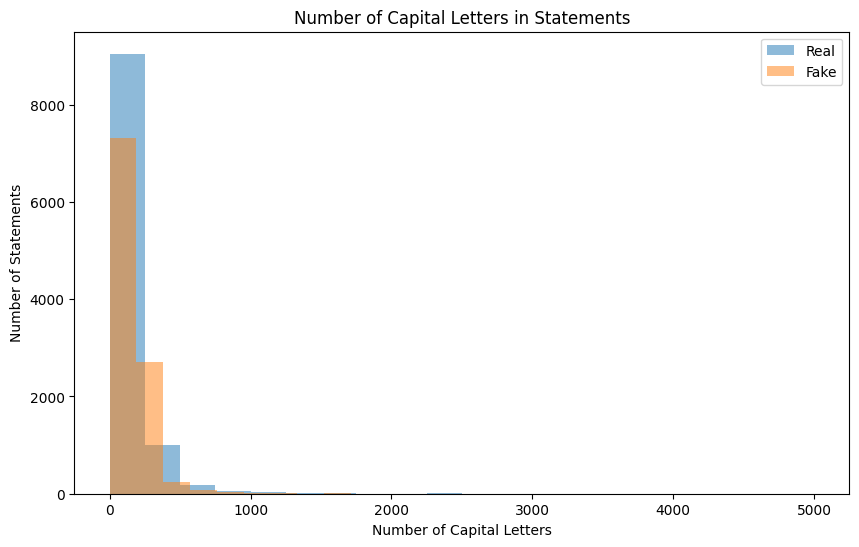

In [7]:
# Plotting the number of capital letters for each different label:
plt.figure(figsize=(10,6))
plt.title('Number of Capital Letters in Statements')
plt.xlabel('Number of Capital Letters')
plt.ylabel('Number of Statements')
plt.hist(news_df[news_df['label']  == 1]['Number of Caps'], bins=20, alpha=0.5, label='Real')
plt.hist(news_df[news_df['label'] == 0]['Number of Caps'], bins=20, alpha=0.5, label='Fake')
plt.legend(loc='upper right')
plt.show()